#NEURAL NETWORK REGRESSION WITH TENSORFLOW

###Introduction to regression with Neural networks in TensorFlow



In [ ]:
#Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


###Creating a Tensor for view and fit

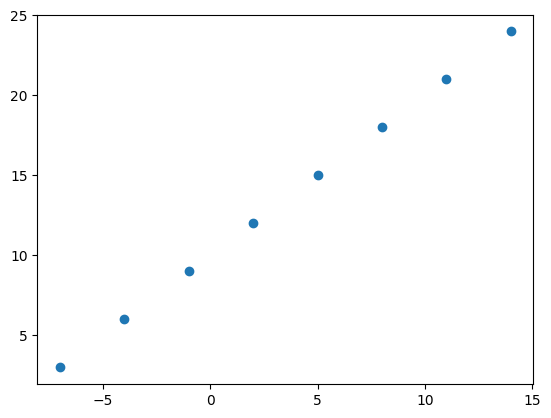

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it

plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and output shapes

In [ ]:
#create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0],y[0]

(-7.0, 3.0)

In [ ]:
X[1],y[1]

(-4.0, 6.0)

NOTE:

 OLD

 Fit the model


model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+

 New

 Fit the model


model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

In [ ]:
#Turnout numpy array into tensors

X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

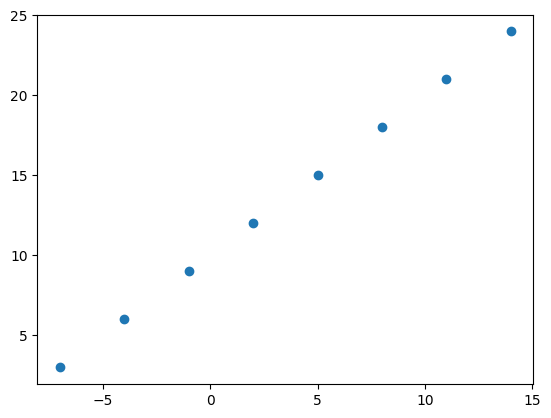

In [ ]:
plt.scatter(X,y)

###Steps in modelling with tensorflow

1.**Creating a model** - define the input and output layer as well as the hidden layers of a deep learning model

2.**Compiling the model** - define the loss function and the optimizer and evaluation metrics

- loss
- optimizer
- metrics

3.**Fitting the mode**l - letting the model try to find patterns between X and Y

- epochs - how many times the model will go through all of the training examples

NOTE:

A Dense layer, also known as a fully connected layer, is a type of layer commonly used in neural networks. It is one of the basic building blocks of deep learning models.

In a Dense layer, each neuron is connected to every neuron in the previous layer. It means that all the input values from the previous layer are fed into each neuron of the Dense layer. The output of a Dense layer is computed by applying a linear operation (dot product) followed by an activation function to introduce non-linearity.

The term "dense" refers to the fact that every neuron in the layer is densely connected to all the neurons in the previous layer. The number of neurons in a Dense layer determines the dimensionality of the layer's output

In [ ]:
#optinally, the first layer can receive an 'input_shape' argument:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
#Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))


model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
...

model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
#set random seed
tf.random.set_seed(42)

#1.create model using the sequential api

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,#mae is the short form of mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short form of stochasitc gradient
              metrics=["mae"])

#3,Fit the model
model.fit(tf.expand_dims(X, axis=-1), y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 374ms/step - loss: 14.2746 - mae: 14.2746
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 14.1421 - mae: 14.1421
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 14.0096 - mae: 14.0096
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 13.8771 - mae: 13.8771
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 13.7446 - mae: 13.7446


In [ ]:
#checkout x and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims([17.0],axis=-1))
y_pred

1/1 [==============================] - 0s 51ms/step


array([[-0.7373435]], dtype=float32)

In [ ]:
y_pred +11

array([[10.262656]], dtype=float32)

Improving the model

- we can improve a model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the nimber of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimiztion function

3. **Fitting a model** - here we might fit a model for more epochs(leave it training for longer) or on more data(give the model more examples to learn from)

In [ ]:
#rebuild the model

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile  the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model(this time we will train for longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 230ms/step - loss: 21.2107 - mae: 21.2107
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 20.8176 - mae: 20.8176
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 20.4532 - mae: 20.4532
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 20.1720 - mae: 20.1720
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 19.8907 - mae: 19.8907
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 19.6095 - mae: 19.6095
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 19.3282 - mae: 19.3282
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 19.0470 - mae: 19.0470
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 18.7657 - mae: 18.7657
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 18.4845 - mae: 18.4845
Epoch 11/100
1/1 [==============================] - 0s 7m

In [ ]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
prediction=model.predict(tf.expand_dims([17.0],axis=-1))
prediction

1/1 [==============================] - 0s 33ms/step


array([[29.174402]], dtype=float32)

In [ ]:
#make little changes in the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 13.7880 - mae: 13.7880
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4723 - mae: 13.4723
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1799 - mae: 13.1799
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9105 - mae: 12.9105
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6571 - mae: 12.6571
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4136 - mae: 12.4136
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.1695 - mae: 12.1695
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9166 - mae: 11.9166
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.6559 - mae: 11.6559
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3903 - mae: 11.3903
Epoch 11/100
1/1 [==============================] - 0s 11

In [ ]:
prediction = model.predict(tf.expand_dims([17.0],axis=-1))
prediction

1/1 [==============================] - 0s 47ms/step


array([[31.264448]], dtype=float32)

Common ways to improve a deep model:
- adding layers(no of times dense layer is defined)
- incresase the no of hidden units(the number given inside the dense layer)
- change the activation functions
- change the optimization function
- change the learning rate
- fitting on more data
- fitting for longer(the epochs value)

These are the Hyperparameters

###Evaluating a model

In practise , atypical workflow you'll go through when building neural networks is:


Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...


In [ ]:
#Make a bigger dataset

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

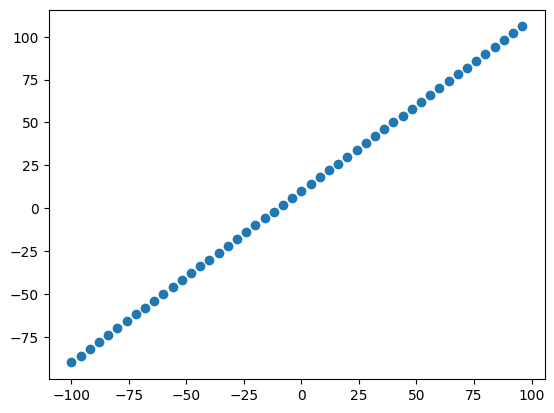

In [ ]:
#visualize the data
plt.scatter(X,y)

### The 3 sets...
- **Training set** - 70-80%
- **validation set** - 15-20%
- **Test set** - 15-20%


In [ ]:
#check the length of how many samples we have
len(X)

50

In [ ]:
#split the data into train and test sets
X_train = X[:40] #first 40 are the training samples(80% of  the data)
y_train = y[:40]

X_test = X[40:] #last 10 are the testing samples(20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train),len(y_test)

(40, 10, 40, 10)

Visualizing the data

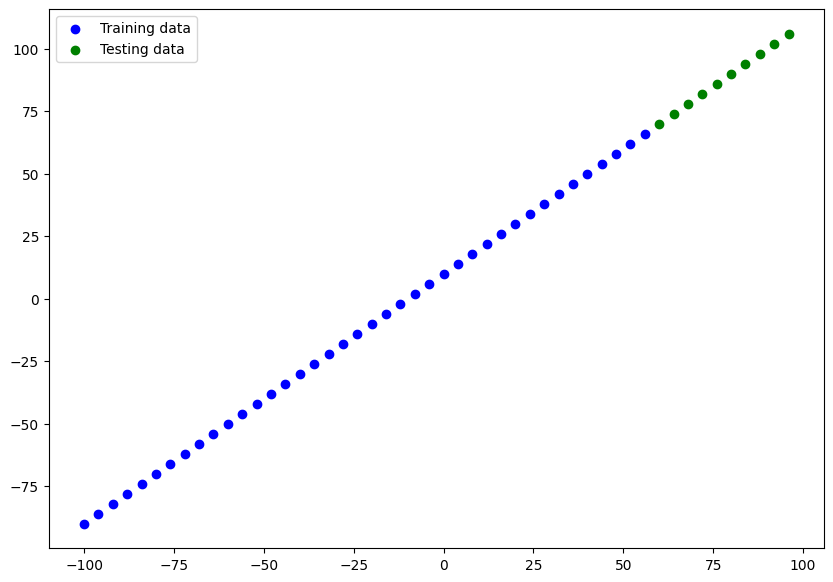

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c="g",label="Testing data")
plt.legend()

In [ ]:
#lets have a look at how to build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

In [ ]:
#model.summary()

In [ ]:
#lets create a model which builds automatically by defining the input_shape argument in t he first layer
tf.random.set_seed(42)

#lets create a mode
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape = [1],name="input_layer"),
    tf.keras.layers.Dense(1,name="outpur_layer")
],name="Model_1")

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outpur_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- Total params = total nof parameters in the model
- trainable parameters - these are the parameters(patterns) the model can update as it trains
- Non-trainable parameters - these parameters arent updated during training

In [ ]:
#fitting the model to the training data set
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)


Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 42.4472 - mae: 42.4472
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 32.1196 - mae: 32.1196
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 37.0660 - mae: 37.0660
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.6934 - mae: 27.6934
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.0977 - mae: 15.0977
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0107 - mae: 12.0107
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3410 - mae: 11.3410
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1796 - mae: 11.1796
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 41.3381 - mae: 41.3381
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.6200 - mae: 28.6200
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 outpur_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


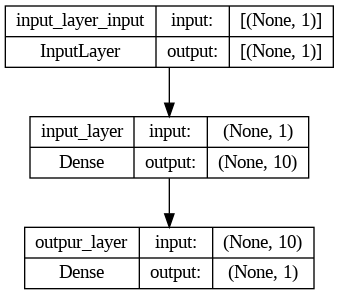

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

###Vizualizing the models predictions

To visualize predictions, its a good idea to plot them against the ground truth labels

Often you will see this in the form of y_test or y_true versus y_pred(ground truth versus our models predictions)

In [ ]:
#make some predictions
y_preds = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 42ms/step


array([[-0.7373435]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  """
  Plots training data, test data, and compares predictions to ground truth value.
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.legend()

  if len(test_data) == len(predictions):
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  plt.legend()


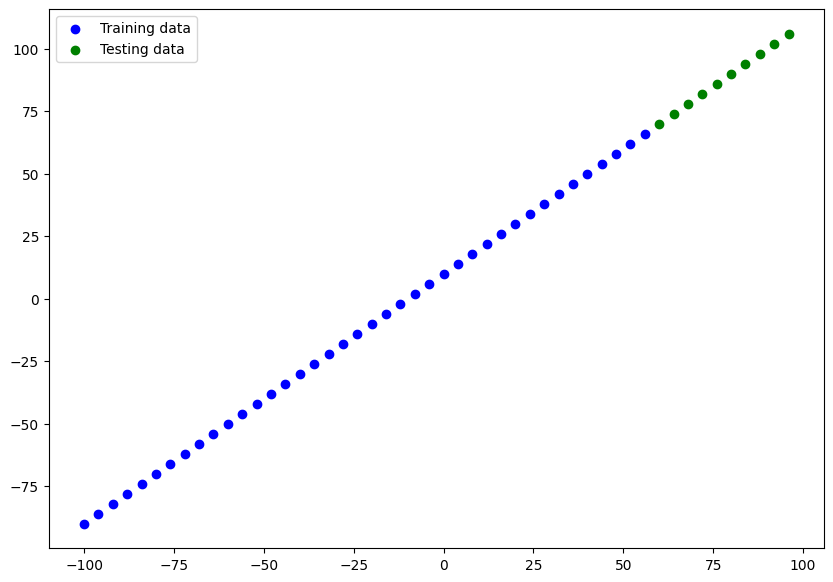

In [ ]:
plot_predictions()

Evaluating the models predictions with regression evaluation metrics:

**MAE** - tf.keras.losses.MAE() or tf.metrics.mean_absolute_error()

**MSE** - tf.keras.losses.MSE() or tf.metrics.mean_square_error()

**Huber** - tf.keras.losses.Huber()

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 98ms/step - loss: 17.7000 - mae: 17.7000


[17.699951171875, 17.699951171875]

In [ ]:
#Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
mae


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([88.73734], dtype=float32)>

In [ ]:
tf.keras.losses.MSE(y_test,tf.squeeze(y_pred))


<tf.Tensor: shape=(), dtype=float32, numpy=8006.3154>

In [ ]:
#Make sopme funcions to reuse MAE and MSE

def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)

Running experiments to improve the model

Model1: same as the original model, 1 layer, trained for 100 epochs

Model2: 2 layers, trained for 100 epochs

Moedl3: 2 layers, trained for 500 epochs

In [ ]:
X_train,y_train


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 65.1895 - mae: 65.1895
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 30.1103 - mae: 30.1103
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3295 - mae: 10.3295
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 12.7421 - mae: 12.7421
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 11.7869 - mae: 11.7869
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9041 - mae: 10.9041
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7160 - mae: 8.7160
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7559 - mae: 7.7559
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.9703 - mae: 19.9703
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 13.7276 - mae: 13.7276
Epoch 11/100
2/2 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 37ms/step


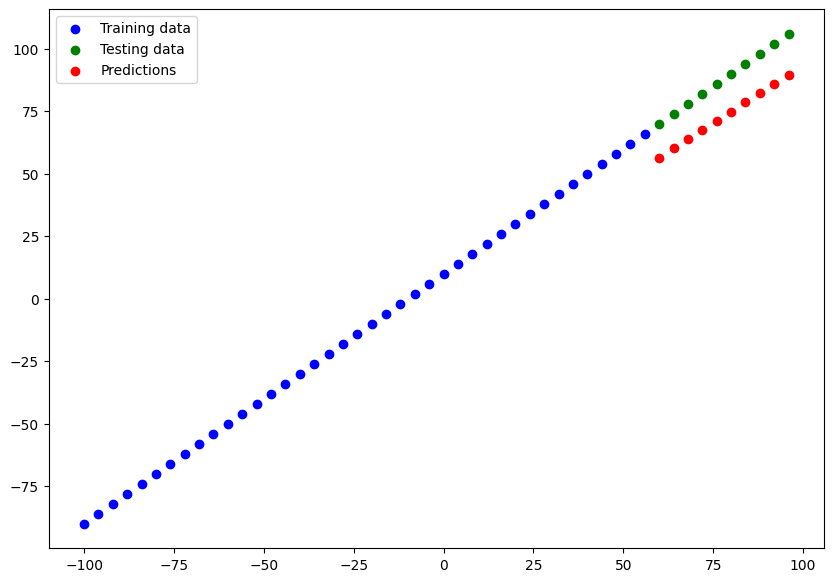

In [ ]:
#Make and plot prediction for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.474304],
        [60.153885],
        [63.833466],
        [67.51305 ],
        [71.19262 ],
        [74.8722  ],
        [78.55178 ],
        [82.23135 ],
        [85.910934],
        [89.590515]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.474304, 60.153885, 63.833466, 67.51305 , 71.19262 , 74.8722  ,
        78.55178 , 82.23135 , 85.910934, 89.590515], dtype=float32)>)

In [ ]:
#calculate model_1 evaluation matrics
mae_1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mean_squared_error(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.96759>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1125.8695 ,  907.40607,  716.02136,  551.7153 ,  414.4881 ,
         304.33914,  221.26884,  165.27728,  136.3642 ,  134.52974],
       dtype=float32)>)

Build model 2

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 42.8480 - mse: 2568.3811
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 32.5638 - mse: 1438.3138
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 36.8335 - mse: 2039.6342
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.2618 - mse: 1083.6084
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.8927 - mse: 277.4853
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.8599 - mse: 166.8650
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2074 - mse: 152.3467
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1343 - mse: 161.0187
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.7643 - mse: 2625.9888
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.1196 - mse: 1114.7686
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 38ms/step


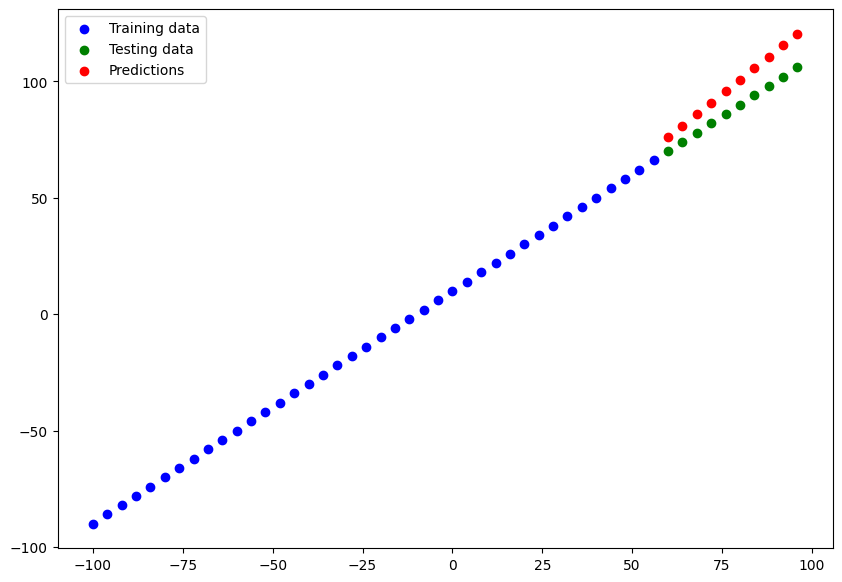

In [ ]:
#make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
#calculate model 2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([13.656282 , 11.2598295, 10.041066 , 10.1477785, 11.4732485,
        13.976415 , 17.657276 , 22.515831 , 27.460068 , 32.40429  ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 278.26007,  183.11642,  136.86348,  139.50153,  191.03033,
         291.45016,  440.7609 ,  638.96265,  886.0553 , 1182.0378 ],
       dtype=float32)>)

In [ ]:
#model_3
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 40.4139 - mse: 2266.3879
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 31.0510 - mse: 1287.6904
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 36.0311 - mse: 1954.0505
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 27.7017 - mse: 1122.8198
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 15.0994 - mse: 287.7533
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 12.0093 - mse: 174.2230
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.3355 - mse: 155.8387
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1717 - mse: 167.4236
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 41.2781 - mse: 2703.9438
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 28.5678 - mse: 1152.0201
Epoch 11/500
2/2 [========================

1/1 [==============================] - 0s 35ms/step


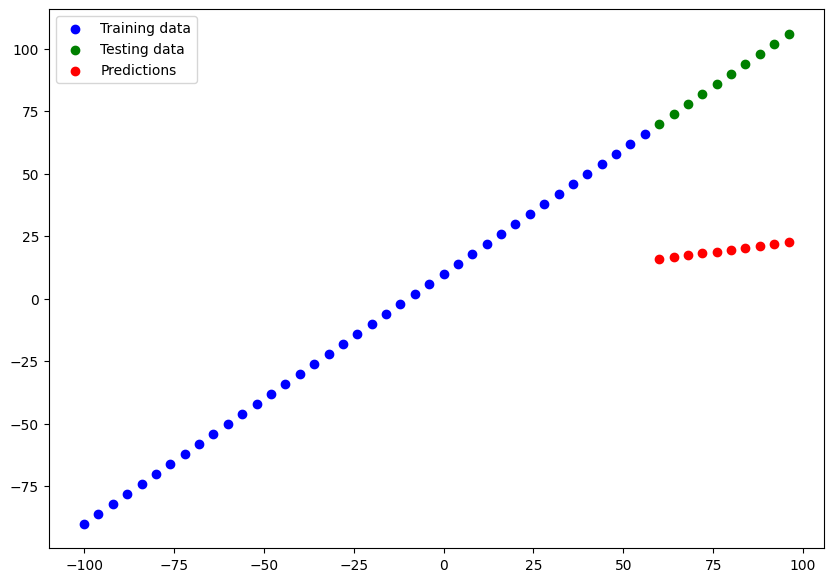

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [ ]:
#calculate model 3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([72.15771 , 71.39546 , 70.633224, 69.87097 , 69.108734, 68.3465  ,
        67.58425 , 66.82201 , 66.05977 , 65.29752 ], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([5338.7344, 5229.312 , 5121.0522, 5013.9526, 4908.0166, 4803.2437,
        4699.6313, 4597.1807, 4495.893 , 4395.7666], dtype=float32)>)

Compare the results of all the three models

In [ ]:
import pandas as pd

model_results = [["models_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3",mae_3.numpy(), mse_3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,models_1,14.96759,"[1125.8695, 907.40607, 716.02136, 551.7153, 41..."
1,model_2,"[13.656282, 11.2598295, 10.041066, 10.1477785,...","[278.26007, 183.11642, 136.86348, 139.50153, 1..."
2,model_3,"[72.15771, 71.39546, 70.633224, 69.87097, 69.1...","[5338.7344, 5229.312, 5121.0522, 5013.9526, 49..."


"Tensorboard" and "weight and biases" are two vizualiztion tools used for visualizing different models performance

###Saving the models

Saving the model allows us to use them outside of Google colab(orwhatever they were trained) such as an web application or a mobile app

There are two main formats we can save our model's too:

1. The SaveModel format
2. The HDF5 format

In [ ]:
#saving a model using savedmodel format

model_2.save("best_model_SavedModel_format")

In [ ]:
#save model using the hdfi format
model_2.save("best_model_HDF5_format.h5")

Loading in a saved module

In [ ]:
#load in the saved in model format

loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              2000      
                                                                 
 dense_19 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              2000      
                                                                 
 dense_19 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compare model_2 predictions with the SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 15ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#loading a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              2000      
                                                                 
 dense_19 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1000)              2000      
                                                                 
 dense_19 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
load_model_2 = model_2.predict(X_test)
loaded_model_h5_pred = loaded_h5_model.predict(X_test)
loaded_model_2 == loaded_model_h5_pred

1/1 [==============================] - 0s 16ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

To save and dowload models in colab

In [ ]:
 #Downloads files from Google colab
from google.colab import files
files.download("Path")

In [ ]:
#Save a file from google colab to google drive (requires mounting Google drive)
!cp Path_of_the_model Path_were_you_need_to_store

###A larger example

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
insurance = pd.read_csv("/content/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#One hot encoding - to convert all the object type attributes to numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#create x and y i.e., features and labels

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 6s 3ms/step - loss: 13278.8564 - mae: 13278.8564
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13089.0098 - mae: 13089.0098
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12715.5430 - mae: 12715.5430
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12010.5469 - mae: 12010.5469
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10853.1631 - mae: 10853.1631
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9395.0967 - mae: 9395.0967
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8092.5859 - mae: 8092.5859
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7496.3809 - mae: 7496.3809
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7405.2212 - mae: 7405.2212
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7385.9004 - mae:

In [ ]:
#check the results of the model on the test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3492.6528 - mae: 3492.6528


[3492.65283203125, 3492.65283203125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Text(0.5, 0, 'Epochs')

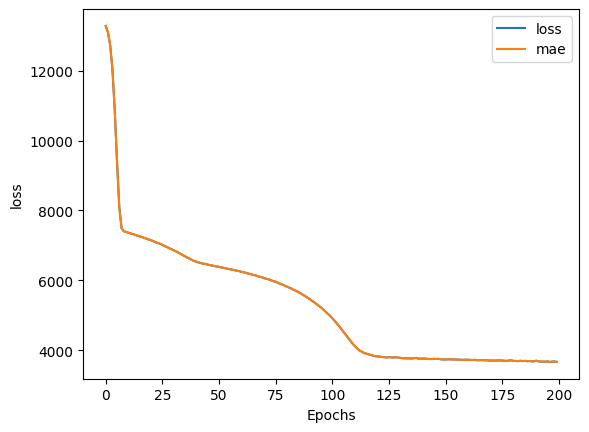

In [ ]:
#plot history(also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("Epochs")

###Pre-processing(Normalization and Standardization)

- The use of normalization is for making the range of different attributes the same
(or to change the values in columns to a common scale)
  - MinMaxScalar
  - Standard Scalar

<Axes: ylabel='Frequency'>

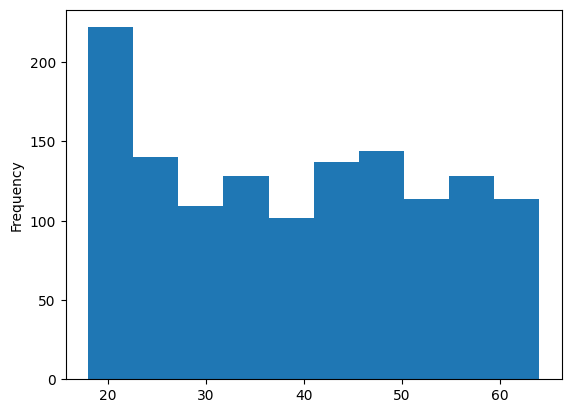

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

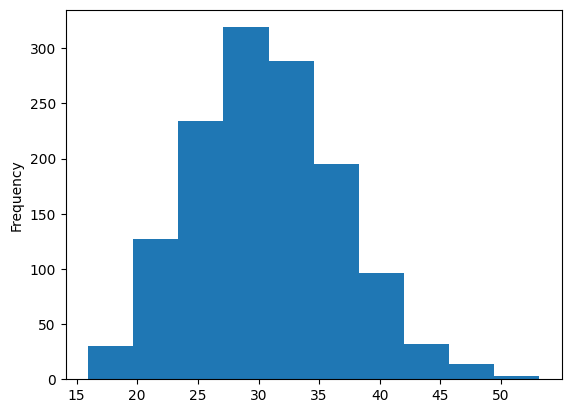

In [ ]:
X["bmi"].plot(kind="hist")

To prepare the data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
)
#create x and y
X = insurance.drop("charges",axis=1)
y=insurance["charges"]

#Build the train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

#fit the column transformer to the training data
ct.fit(X_train)

#Transform training and test data with normaliztion(Min max scaler) and Onehot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#how the data looks after normaliozation and encoding
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#Building a neural network model to fit the normalized data

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#Fit the model
insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 5ms/step - loss: 13343.7266 - mae: 13343.7266
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13335.0723 - mae: 13335.0723
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 13313.5488 - mae: 13313.5488
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 13268.6094 - mae: 13268.6094
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 13188.9258 - mae: 13188.9258
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13063.6113 - mae: 13063.6113
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 12882.6045 - mae: 12882.6045
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12635.8652 - mae: 12635.8652
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 12313.1875 - mae: 12313.1875
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 11910.48

In [ ]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.2942 - mae: 3438.2942


[3438.294189453125, 3438.294189453125]